<a href="https://colab.research.google.com/github/mohcineelharras/daml_project/blob/main/project/daml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAML Poject

## Context

Les critères suivants seront appréciés :
* Compte-rendu : clarté et pertinence des explications, qualité de la présentation (en particulier les équations), analyse et interprétation des résultats ;
* Travail fourni : conformité aux objectifs précisés dans le texte, quantité
et qualité des résultats et conclusions ;
* Initiative et originalité.


**Présenter (avec synthèse) l’algorithme k-means et les algorithmes EM et CEM appliqués au modèle de mélange gaussien.**

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import seaborn as sns, numpy as np
from sklearn.neighbors import KernelDensity
import numpy as np
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point
import random
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal, norm
import pandas as pd
import io
import requests
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import numpy as np
from sklearn import mixture
import urllib
import zipfile
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.special import logsumexp

In [2]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Simulation

1. Simulation d’un modèle de mélange :

* Écrire une fonction qui simule n points du plan suivant un modèle
de mélange de deux lois gaussiennes définies par leurs proportions,
centres, volumes, formes et orientations.
* Donner quelques exemples de simulation et donner les représentations
graphiques correspondantes.





> $g({\boldsymbol  {x}},{\boldsymbol  {\Phi }})=\sum _{{k=1}}^{g}\pi _{k}f({\boldsymbol  {x}},{\boldsymbol  {\theta }}_{k}) $





### Construct gmm pdf

In [ ]:
#---------------------------------------------------------------------------
def normal_dist(x , mean , sd):
  #prob_density = (1/(2*np.pi*sd**2)) * np.exp(-0.5*((x-mean)/sd)**2)
  prob_density=norm(mean, sd)
  return prob_density.pdf(x)
#***************************************************************************
#---------------------------------------------------------------------------
def gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  # Creating a series of gaussian data
  x1 = np.random.normal(mu1, sigma1, int(n*pi1))
  x2 = np.random.normal(mu2,  sigma2, int(n*pi2))
  # Creating a series of x for the plot
  #x = np.linspace(min(x1.min(),x2.min()),max(x1.max(),x2.max()),1000)
  #Apply function to the data.
  pdf1 = normal_dist(x,mu1,sigma1)
  pdf2 = normal_dist(x,mu2,sigma2)
  #gmm
  pdf3= pi1*pdf1 + pi2*pdf2
  return pdf1,pdf2,pdf3
#***************************************************************************
#---------------------------------------------------------------------------
def plotgmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  pdf1,pdf2,pdf3=gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2)
  #Plotting the Results
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x,pdf1*pi1 , color = 'red',label="mu1="+str(mu1)+", sigma1="+str(sigma1)+", pi1="+str(pi1))
  ax.plot(x,pdf2*pi2 , color = 'blue',label="mu2="+str(mu2)+", sigma2="+str(sigma2)+", pi1="+str(pi2))
  #ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N(mu1="+str(mu1)+",sigma1="+str(sigma1)+")+"+str(pi2)+"N(mu2="+str(mu2)+",sigma2="+str(sigma2)+")")
  ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N1+"+str(pi2)+"N2")
  plt.xlabel('Data points')
  plt.ylabel('Probability Density')
  ax.legend()

**Config 1 :**

$\ N(mu_{1}=0 ,\sigma_{1}=0.1) ; \pi_{1} = 0.4  ; $

$\ N(mu_{2}= 0.2,\sigma_{2}=0.2) ; \pi_{2} =  0.6 ;$

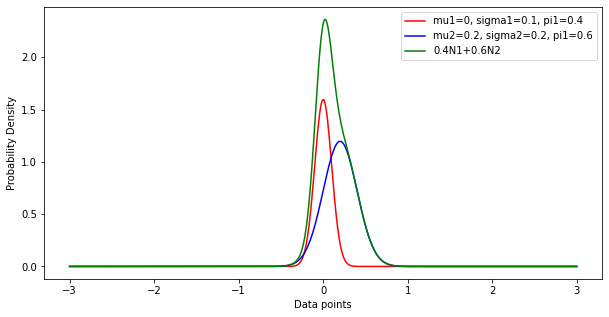

In [ ]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0,sigma1=0.1,pi1=0.4,mu2=0.2,sigma2=0.2,pi2=0.6)

**Config 2 :**

$\ N(mu_{1}= ,\sigma_{1}=) ; \pi_{1} = 0.2  ; $

$\ N(mu_{2}= ,\sigma_{2}=) ; \pi_{2} =  0.8 ;$

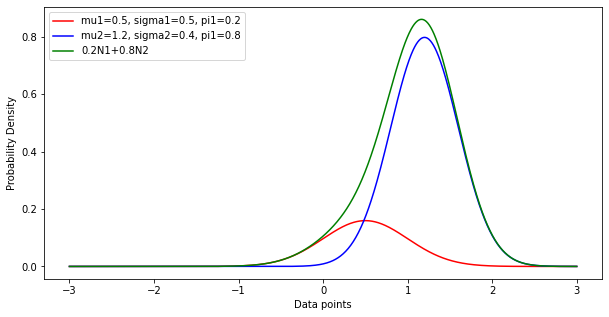

In [ ]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0.5,sigma1=0.5,pi1=0.2,mu2=1.2,sigma2=0.4,pi2=0.8)

### Generate simulated Data from pdf

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


N1 simulated    mu1= 0.002 std1= 0.011
N2 simulated    mu2= 0.608 std2= 0.038
N1 Real         mu1= 0 std1 0.1
N2 Real         mu2 0.6 std2 0.2


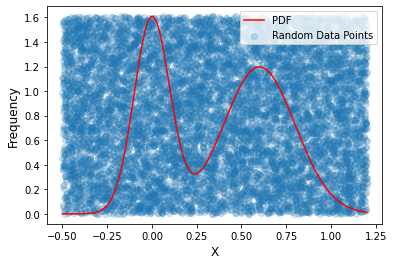

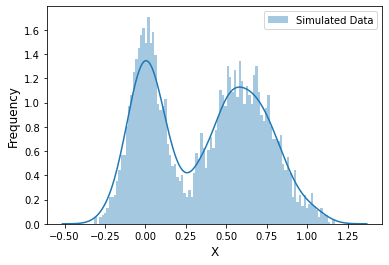

In [ ]:
#---------------------------------------------------------------------------
x=np.linspace(-0.5,1.2,1000)
n=10000
mu1,sigma1,pi1,mu2,sigma2,pi2=0,0.1,0.4,0.6,0.2,0.6
pdf1,pdf2,pdf3 = gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2)
#***************************************************************************
#---------------------------------------------------------------------------
poly = Polygon([(x.min(), pdf3.min()), (x.max(), pdf3.min()), (x.max(), pdf3.max()),(x.min(), pdf3.max())])
min_x, min_y, max_x, max_y = poly.bounds
#---------------------------------------------------------------------------
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
       random_point = Point([random.uniform(min_x, max_x),  random.uniform(min_y, max_y)])
       if (random_point.within(poly)):
           points.append(random_point)
    return points
#---------------------------------------------------------------------------
points = random_points_within(poly, n)
#sampled data points 
xs = [point.x for point in points]
ys = [point.y for point in points]
#---------------------------------------------------------------------------
fig1, ax1 = plt.subplots()
ax1.scatter(xs, ys,alpha=0.2, label='Random Data Points')
ax1.plot(x,pdf3,color='r',label='PDF')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax1.legend()
#---------------------------------------------------------------------------
df = pd.DataFrame({'xs':xs,'ys':ys},index=None)
#---------------------------------------------------------------------------
#using a list
l = []
for i in range(len(df)):
  if df.loc[i,'ys']<gmm2(df.loc[i,'xs'],n,mu1,sigma1,pi1,mu2,sigma2,pi2)[2]:
    l.append([df.loc[i,'xs']])
under_curve = np.asarray(l)
#---------------------------------------------------------------------------
#plotting the results
fig2, ax2 = plt.subplots()
sns.distplot(under_curve,bins=100, label='Simulated Data')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax2.legend()
#***************************************************************************
#---------------------------------------------------------------------------
#***************Redetermine 2 gaussian pdfs*********************************
np.random.seed(1)
g = mixture.GaussianMixture(n_components=2)
# Generate random observations with two modes centered on 0
g.fit(under_curve) 
print("N1 simulated   ","mu1=",np.round(g.means_, 3)[0][0],"std1=",np.round(g.covariances_, 3)[0][0][0])
print("N2 simulated   ","mu2=",np.round(g.means_, 3)[1][0],"std2=",np.round(g.covariances_, 3)[1][0][0])
print("N1 Real        ","mu1=",mu1,"std1",sigma1)
print("N2 Real        ","mu2",mu2,"std2",sigma2)

## Conditional Expectation Maximization (CEM)

* Programmer l’algorithme CEM pour les modèles parcimonieux [π,λI],
[πk, λI], [π, λkI] et [πk, λkI].

In [377]:
class GMM:
#---------------------------------------------------------------------------
    def __init__(self,X,df,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.df = df
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
#---------------------------------------------------------------------------
    """Define a function which runs for iterations, iterations"""
    def CEM(self,C):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
#---------------------------------------------------------------------------
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        if X.shape[1]>2 : 
          for dim in range(len(cov)):
            self.cov[dim]=np.array(self.df.drop("Risk",axis=1).cov())
            self.mu[dim]=np.array(self.df.drop("Risk",axis=1).mean())
        else:
            for dim in range(len(self.cov)):
              np.fill_diagonal(self.cov[dim],5)
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
#--------------------------------------------------------------------------- 
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co,allow_singular=True)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c,allow_singular=True).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)
#---------------------------------------------------------------------------
            """C Step"""
            z_ic=np.where(r_ic>0.5, 1, 0)
            if C:
              r_ic=z_ic

            #print(z_ic)
            #print(r_ic)
#---------------------------------------------------------------------------
            """M Step"""
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j],allow_singular=True).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
#---------------------------------------------------------------------------
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        if X.shape[1]<=2 :
          # PLot the point onto the fittet gaussians
          fig3 = plt.figure(figsize=(10,10))
          ax2 = fig3.add_subplot(111)
          ax2.scatter(self.X[:,0],self.X[:,1])
          for m,c in zip(self.mu,self.cov):
              multi_normal = multivariate_normal(mean=m,cov=c)
              ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
              ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
              ax2.set_title('Final state')
              for y in Y:
                  ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c,allow_singular=True).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov,allow_singular=True).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
    def predict_vec(self,vec):
      prediction = [] 
      prediction_2=[]
      for x in vec:
        prediction = []
        for m,c in zip(self.mu,self.cov):
          prediction.append(multivariate_normal(mean=m,cov=c,allow_singular=True).pdf(x)/np.sum([multivariate_normal(mean=mean,cov=cov,allow_singular=True).pdf(x) for mean,cov in zip(self.mu,self.cov)]))
        prediction_2.append(np.array(prediction))
      prediction_df = pd.DataFrame(prediction_2,columns=["classe_"+str(i) for i in range(len(mu))])
      return prediction_df


In [378]:
Chosen=False
if Chosen :
  #---------------------------------------------------------------------------
  url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
  extract_dir = "data"
  zip_path, _ = urllib.request.urlretrieve(url)
  with zipfile.ZipFile(zip_path, "r") as f:
      f.extractall(extract_dir)
  #---------------------------------------------------------------------------
  df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
  df_dummies=pd.get_dummies(df.dropna())
  X= np.array(df_dummies.drop("Risk",axis=1))
  y= np.array(df_dummies["Risk"])
else:
  #---------------------------------------------------------------------------
  X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                    random_state=0)

In [429]:
%%time
GMM_test = GMM(X,df_dummies,2,50)     
GMM_test.CEM(C=False)

pd_pred=GMM_test.predict_vec(X)
hard_class=np.where(pd_pred>0.5, 1, 0)
pd_pred_full=pd.DataFrame(hard_class,columns=pd_pred.columns)
pd_pred_full['y']=y
pd_pred_full['y_pred']=np.array(pd_pred_full["classe_0"]==1,dtype="int")
print(pd_pred_full.head(10))

   classe_0  classe_1  y  y_pred
0         1         0  1       1
1         0         1  0       0
2         0         1  0       0
3         0         1  1       0
4         0         1  0       0
5         0         1  0       0
6         1         0  1       1
7         1         0  1       1
8         1         0  1       1
9         0         1  0       0
CPU times: user 10.2 s, sys: 8.88 s, total: 19.1 s
Wall time: 9.74 s


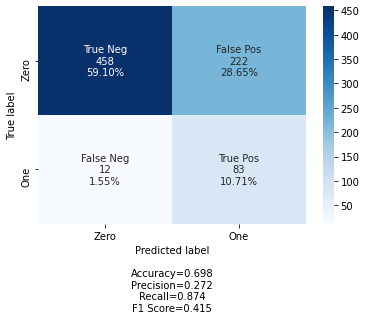

In [430]:
#Confusion Matrix
cf_matrix=confusion_matrix(pd_pred_full['y_pred'], pd_pred_full['y'])
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )

## Comparaison de CEM avec K-means

**Comparer votre algorithme et l’algorithme des kmeans sur des jeux de données simulées et réelles.**


Pour les données simulées, on utilise la fonction make_blobs
Pour les données réelles, vous pouvez choisir (en motivant ce choix) une application et un jeu de données parmi ceux proposés sur le site web :
      http://archive.ics.uci.edu/ml/datasets.php

* Le jeu de données choisi est **Audit Data Data Set**

In [415]:
#***************************************************************************
#---------------------------------------------------------------------------
Chosen=True
if Chosen :
  #---------------------------------------------------------------------------
  url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
  extract_dir = "data"
  zip_path, _ = urllib.request.urlretrieve(url)
  with zipfile.ZipFile(zip_path, "r") as f:
      f.extractall(extract_dir)
  #---------------------------------------------------------------------------
  df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
  df_dummies=pd.get_dummies(df.dropna())
  X= np.array(df_dummies.drop("Risk",axis=1))
  y= np.array(df_dummies["Risk"])
else:
  #---------------------------------------------------------------------------
  X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                    random_state=0)

#### PCA

explained variance ratio (first two components): [0.63235461 0.31874   ]


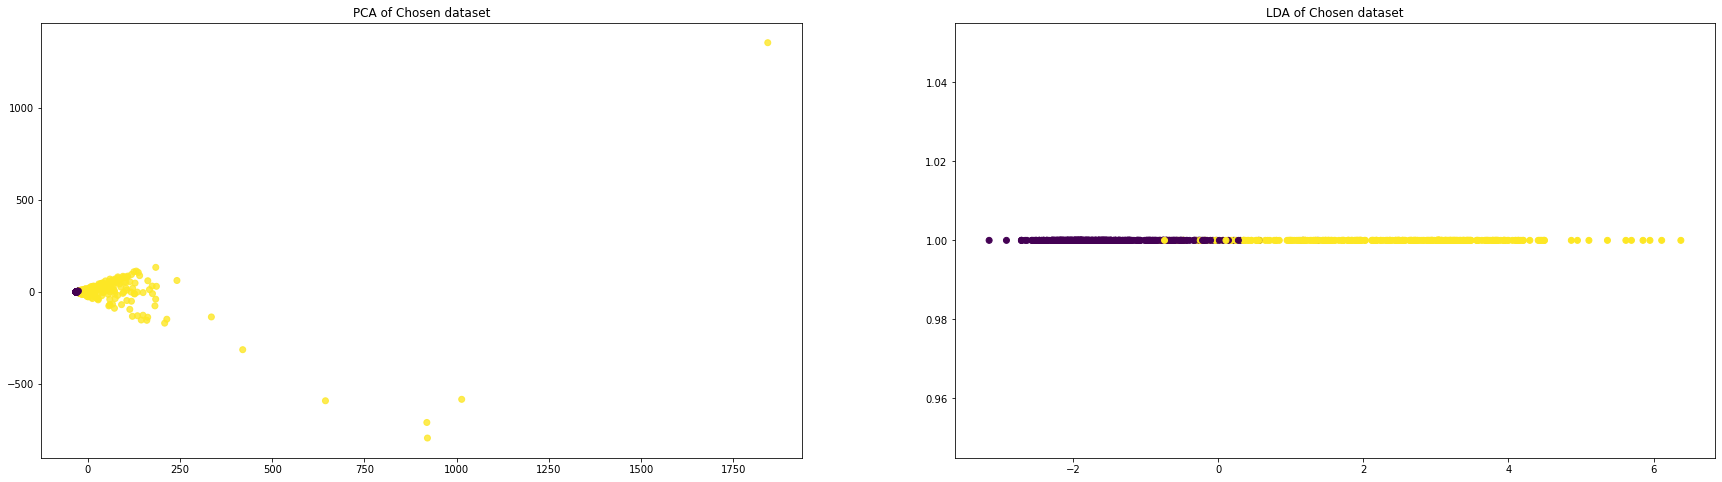

In [416]:
#***************************************************************************
#---------------------------------------------------------------------------
target_names = y
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
#***************************************************************************
#---------------------------------------------------------------------------
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
#***************************************************************************
#---------------------------------------------------------------------------
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
f, axs = plt.subplots(1,2,figsize=(30,8))
axs[0].scatter(X_r[:, 0], X_r[:, 1], c=y, alpha=.8,)
axs[0].set_title('PCA of Chosen dataset')
axs[1].scatter(X_r2,np.ones(X_r2.shape[0]),c=y)
axs[1].set_title('LDA of Chosen dataset')
plt.show()

#### K-means

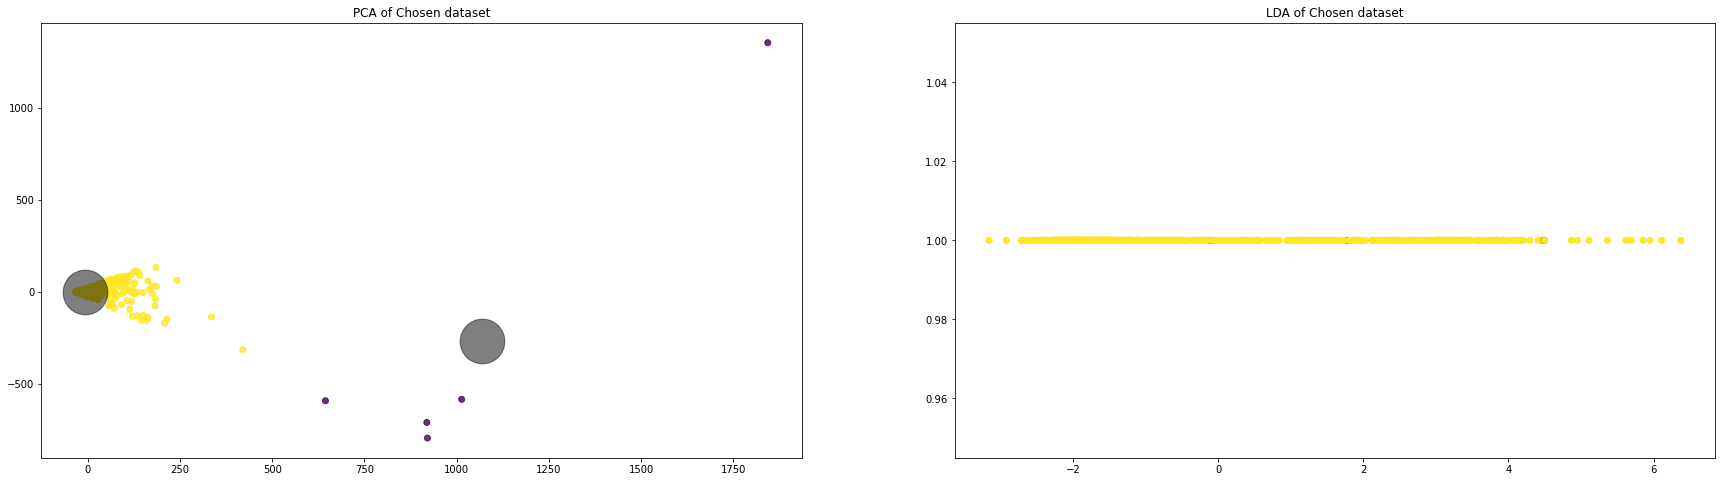

In [417]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_r)
y_kmeans = kmeans.predict(X_r)
f, axs = plt.subplots(1,2,figsize=(30,8))
axs[0].scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, alpha=.8,)
centers = kmeans.cluster_centers_
axs[0].scatter(centers[:, 0], centers[:, 1], c='black', s=2000, alpha=0.5);
axs[0].set_title('PCA of Chosen dataset')
axs[1].scatter(X_r2,np.ones(X_r2.shape[0]),c=y_kmeans)
axs[1].set_title('LDA of Chosen dataset')
plt.show()

#### CEM

   classe_0  classe_1  y  y_pred
0         1         0  1       0
1         0         1  0       1
2         0         1  0       1
3         0         1  1       1
4         0         1  0       1
5         0         1  0       1
6         1         0  1       0
7         1         0  1       0
8         1         0  1       0
9         0         1  0       1


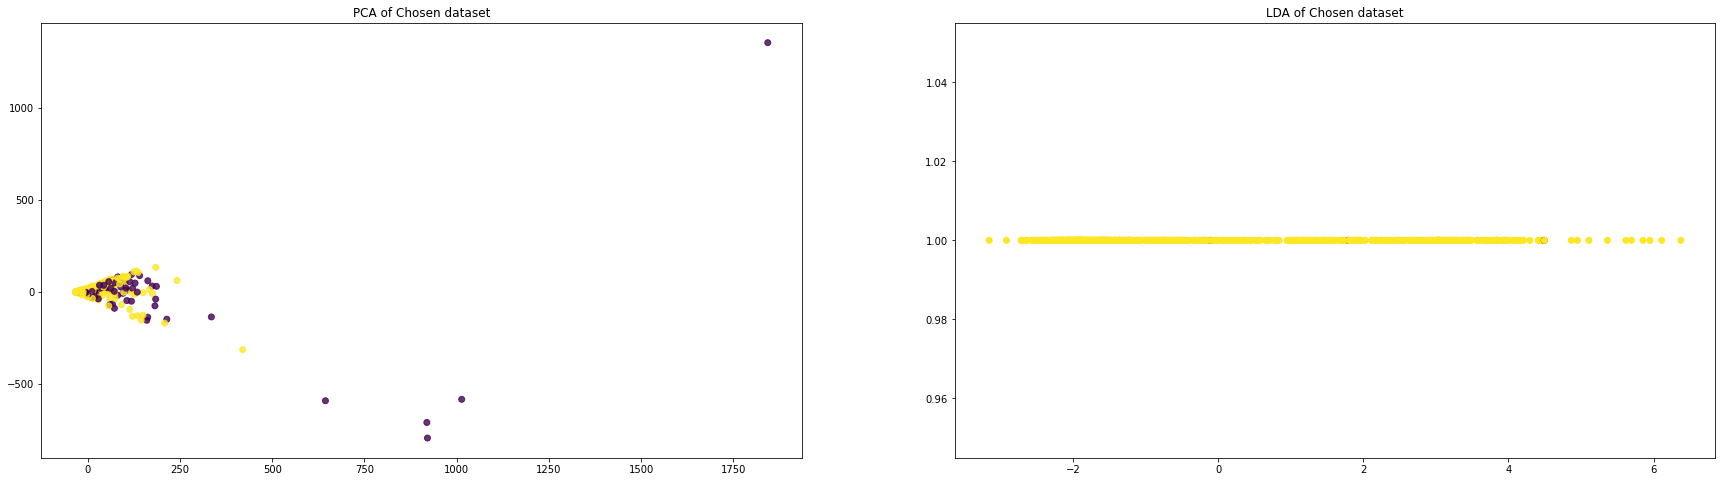

CPU times: user 10.5 s, sys: 8.55 s, total: 19.1 s
Wall time: 9.92 s


In [432]:
%%time
GMM_test = GMM(X,df_dummies,2,50)     
GMM_test.CEM(C=False)

pd_pred=GMM_test.predict_vec(X)
hard_class=np.where(pd_pred>0.5, 1, 0)
pd_pred_full=pd.DataFrame(hard_class,columns=pd_pred.columns)
pd_pred_full['y']=y
pd_pred_full['y_pred']=np.array(pd_pred_full["classe_0"]==0,dtype="int")
print(pd_pred_full.head(10))

f, axs = plt.subplots(1,2,figsize=(30,8))
axs[0].scatter(X_r[:, 0], X_r[:, 1], c=pd_pred_full['y_pred'], alpha=.8,)
axs[0].set_title('PCA of Chosen dataset')
axs[1].scatter(X_r2,np.ones(X_r2.shape[0]),c=y_kmeans)
axs[1].set_title('LDA of Chosen dataset')
plt.show()

* Pour les données simulées, on comparera tout d’abord les deux algorithmes lorsque les classes sont très séparées (err ≈ 0.05 c.à.d. chevauchement des classes de 5%); pour cela, on étudiera des situations correspondant à des proportions égales, différentes ou très différentes et des situations correspondant à des volumes égaux, différents ou très différents. 
* On fera les mêmes comparaisons lorsque les classes sont moyennement séparées (err ≈ 0.15) et très séparées (err ≈ 0.30). 

### err = 0.05 chevauchement des classes de 5%

#### Proportions égales

#### Proportions différentes

#### Proportions très différentes

### err = 0.15 chevauchement des classes de 15%

### err = 0.3 chevauchement des classes de 30%

## Apprentissage Supervisé (classement ou classification)
* Comment peut-on utiliser les modèles de mélange pour faire de l’apprentissage supervisé (classement)? Illustrer votre réponse par une application de votre choix. 

**On peut estimer la densité de probabilité en calculant la moyenne empirique et la variance empirique pour chaque classe et ensuite on aura accès à la loi gaussienne de chaque classe ce qui permettra d'estimer la probabilité d'appartenance d'un point dans l'espace à cette classe là**

* Proposer ainsi une autre méthode d’apprentissage supervisé, la Présenter (avec synthèse) et la comparer avec les modèles de mélange.


**L'algorithmes d'apprentissage supervisé choisi sont la régression logistique.**

### Logistic regression
Algorithme d'apprentissage supervisé qui permet de faire de la classification


\begin{equation}
    \ Z = β₀ + β₁X
\end{equation}



Hypothèse fondamentale

1.   Hypothèse fondamentale (Sigmoid Function)


\begin{equation}
    \ hΘ(x) = 1/(1 + e^-(β₀ + β₁X)
\end{equation}


\begin{equation}
    \ 𝑃(𝑐𝑙𝑎𝑠𝑠=1)=hΘ(x) = sigmoid(Z)
\end{equation}

2.   Frontière de décision
\begin{equation}
    \ 𝑝≥0.5 => 𝑐𝑙𝑎𝑠𝑠=1 
\end{equation}
\begin{equation}
    \ 𝑝<0.5 => 𝑐𝑙𝑎𝑠𝑠=0
\end{equation}


3.   Fonction de cout

Pour des raisons de convexité, on définit la fonction de coût suivante

\begin{equation}
    \ Cost(ℎ𝜃(𝑥),𝑦)=−𝑦log(ℎ𝜃(𝑥))−(1−𝑦)log(1−ℎ𝜃(𝑥))
\end{equation}


4.   Gradient Descent


\begin{equation}
    \ 𝜃𝑗= 𝜃𝑗  - \nabla 𝐽(𝜃)
\end{equation}



#### Simple Dataset

**Import and split data**

In [ ]:
#---------------------------------------------------------------------------
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,
                  random_state=0)
#---------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
#***************************************************************************
#---------------------------------------------------------------------------
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Training DataSet

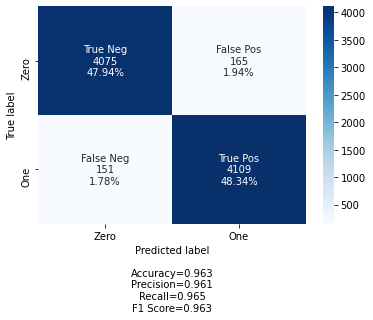

In [ ]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_train)
#***************************************************************************
#---------------------------------------------------------------------------
#Confusion Matrix
cf_matrix=confusion_matrix(y_pred, y_train)
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )


##### Testing DataSet

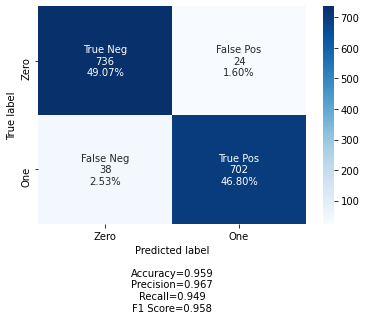

In [ ]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_test)
#***************************************************************************
#---------------------------------------------------------------------------
#Confusion Matrix
cf_matrix=confusion_matrix(y_pred, y_test)
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )

#### Chosen Dataset

**Import and split dataset**

In [ ]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
extract_dir = "data"
zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)
df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
df_dummies=pd.get_dummies(df.dropna())
#***************************************************************************
#---------------------------------------------------------------------------
X=df_dummies.drop("Risk",axis=1)
y=df_dummies["Risk"]
#---------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#***************************************************************************
#---------------------------------------------------------------------------
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Training DataSet

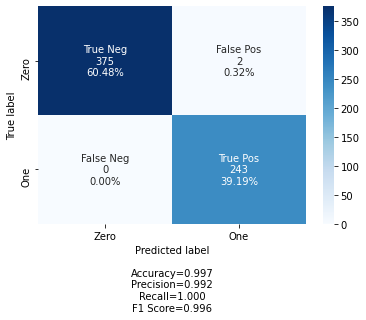

In [ ]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_train)
#***************************************************************************
#---------------------------------------------------------------------------
#Confusion Matrix
cf_matrix=confusion_matrix(y_pred, y_train)
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )


##### Testing DataSet

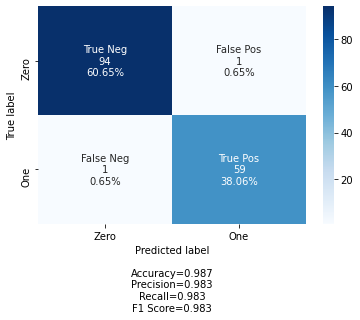

In [ ]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_test)
#***************************************************************************
#---------------------------------------------------------------------------

#Confusion Matrix
cf_matrix=confusion_matrix(y_pred, y_test)
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )


### GMM supervised Learning algorithm

#### Simple Dataset

In [ ]:
#---------------------------------------------------------------------------
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,random_state=0)
df=pd.DataFrame(X)
df["y"]=y

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df[df.y==0]
X_false=df_false.drop("y",axis=1)
y_false=df_false["y"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df[df.y==1]
X_true=df_true.drop("y",axis=1)
y_true=df_true["y"]
print(X_true.shape,y_true.shape)
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

(5000, 2) (5000,)


##### Training DataSet

Training DataSet


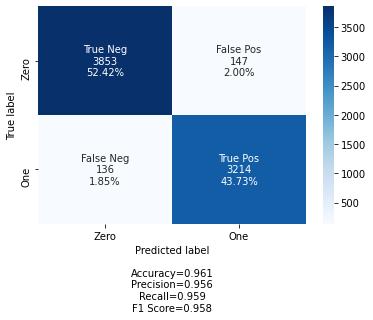

In [ ]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Training DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_train))
true_dist=K_true.pdf(np.array(X_false_train))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_train"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_train))
true_dist=K_true.pdf(np.array(X_true_train))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_train"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_train"]
pddf_negative["y"]=pddf_negative["y_false_train"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
#Confusion Matrix
cf_matrix=confusion_matrix(full_pddf["y"], full_pddf["decision"])
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )

##### Testing DataSet

Testing DataSet


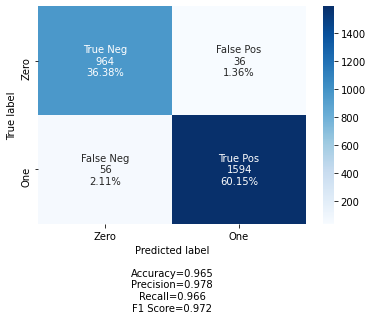

In [ ]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Testing DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_test))
true_dist=K_true.pdf(np.array(X_false_test))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_test"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_test))
true_dist=K_true.pdf(np.array(X_true_test))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_test"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_test"]
pddf_negative["y"]=pddf_negative["y_false_test"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
#Confusion Matrix
cf_matrix=confusion_matrix(full_pddf["y"], full_pddf["decision"])
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )

We must compare the two density for a x value and decide $\lambda_{np} $

#### Chosen Dataset

In [433]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
extract_dir = "data"
zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)
df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
df_dummies=pd.get_dummies(df.dropna())

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Risk==0]
X_false=df_false.drop("Risk",axis=1)
y_false=df_false["Risk"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df_dummies[df_dummies.Risk==1]
# Upsample minority class
#df_true = resample(df_true, replace=True,n_samples=10422,random_state=123)
X_true=df_true.drop("Risk",axis=1)
y_true=df_true["Risk"]
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

##### Training DataSet

Training DataSet


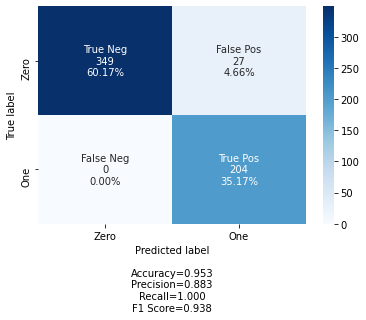

In [434]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Training DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_train))
true_dist=K_true.pdf(np.array(X_false_train))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_train"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_train))
true_dist=K_true.pdf(np.array(X_true_train))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_train"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_train"]
pddf_negative["y"]=pddf_negative["y_false_train"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
#Confusion Matrix
cf_matrix=confusion_matrix(full_pddf["y"], full_pddf["decision"])
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )



##### Testing DataSet

Testing DataSet


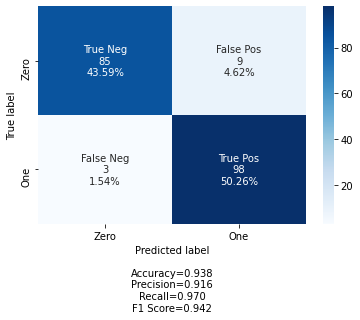

In [436]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Testing DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_test))
true_dist=K_true.pdf(np.array(X_false_test))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_test"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_test))
true_dist=K_true.pdf(np.array(X_true_test))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_test"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_test"]
pddf_negative["y"]=pddf_negative["y_false_test"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
#Confusion Matrix
cf_matrix=confusion_matrix(full_pddf["y"], full_pddf["decision"])
#tn, fp, fn, tp=confusion_matrix(y_test, predictions).ravel()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories, )

## Draft

[0.9936778651468142, 0.006322134853185864]

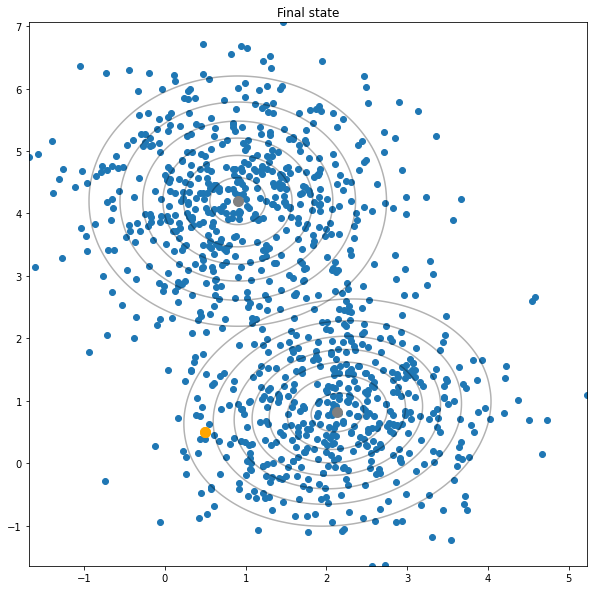

In [142]:
class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)

        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,2,50)     
GMM.run()
GMM.predict([[0.5,0.5]])

In [ ]:
#***************************************************************************
#---------------------------------------------------------------------------
def initialize_random_params(n):
    x1 = np.random.normal(0, 1, size=(n, n))
    x2 = np.random.normal(0, 1, size=(n, n))
    params = {'pi1': np.random.uniform(0, 1),
              'mu1': np.random.normal(0, 1, size=(n,)),
              'mu2': np.random.normal(0, 1, size=(n,)),
              'sigma1': np.dot(x1, x1.transpose()),
              'sigma2': np.dot(x2, x2.transpose())}
    return params
#---------------------------------------------------------------------------
def e_step(x, params):
    log_p_y_x = np.log([1-params["pi1"], params["pi1"]])[np.newaxis, ...] + \
                np.log([multivariate_normal(params["mu1"], params["sigma1"]).pdf(x),
            multivariate_normal(params["mu2"], params["sigma2"]).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])
#---------------------------------------------------------------------------
def m_step(x, params):
    total_count = x.shape[0]
    _, heuristics = e_step(x, params)
    heuristic1 = heuristics[:, 0]
    heuristic2 = heuristics[:, 1]
    sum_heuristic1 = np.sum(heuristic1)
    sum_heuristic2 = np.sum(heuristic2)
    pi1 = (sum_heuristic2/total_count)
    mu1 = (heuristic1[..., np.newaxis].T.dot(x)/sum_heuristic1).flatten()
    mu2 = (heuristic2[..., np.newaxis].T.dot(x)/sum_heuristic2).flatten()
    diff1 = x - mu1
    sigma1 = diff1.T.dot(diff1 * heuristic1[..., np.newaxis]) / sum_heuristic1
    diff2 = x - mu2
    sigma2 = diff2.T.dot(diff2 * heuristic2[..., np.newaxis]) / sum_heuristic2
    params = {'pi1': pi1, 'mu1': mu1, 'mu2': mu2, 'sigma1': sigma1, 'sigma2': sigma2}
    return params
#---------------------------------------------------------------------------
def get_avg_log_likelihood(x, params):
    loglikelihood, _ = e_step(x, params)
    return np.mean(loglikelihood)
#---------------------------------------------------------------------------
def run_em(x):
    params = initialize_random_params(x.shape[1])
    avg_loglikelihoods = []
    while True:
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001:
            break
        params = m_step(x, params)
    print("\tpi1: %s\n\tpi2: %s\n\tmu_1: %s\n\tmu_2: %s\n\tsigma_1: %s\n\tsigma_2: %s"
               % (params['pi1'], 1 - params['pi1'] , params['mu1'], params['mu2'], params['sigma1'], params['sigma2']))
    _, posterior = e_step(x, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods


In [ ]:
#%%time
unsupervised_forecastsforecasts, unsupervised_posterior, unsupervised_loglikelihoods = run_em(X)
print("total steps: ", len(unsupervised_loglikelihoods))
plt.plot(unsupervised_loglikelihoods)
plt.title("unsupervised log likelihoods")
plt.show()

(500, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X)[:,0]
y = np.array(X)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)


In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_dummies=pd.get_dummies(df)

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Revenue==False]
X_false=df_false.drop("Revenue",axis=1)
y_false=df_false["Revenue"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df_dummies[df_dummies.Revenue==True]
# Upsample minority class
df_true = resample(df_true, replace=True,
                                 n_samples=10422,random_state=123)
X_true=df_true.drop("Revenue",axis=1)
y_true=df_true["Revenue"]
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

In [ ]:
n_components = 10
X = df_dummies.drop("Risk",axis=1)
pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=df_dummies.Risk,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = df_dummies.drop("Risk",axis=1)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

X_2d=pca.transform(X)
X_2d.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X_2d)[:,0]
y = np.array(X_2d)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(5,20))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)


In [ ]:
print("")